In [35]:
import matplotlib.pyplot as plt

In [36]:
import json
name = 'best_cnn'
json_file_path = 'log/'+name+'.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

loss_train = data['loss_train']
loss_test = data['loss_test']
f1_train = data['f1_train']
f1_test = data['f1_test']

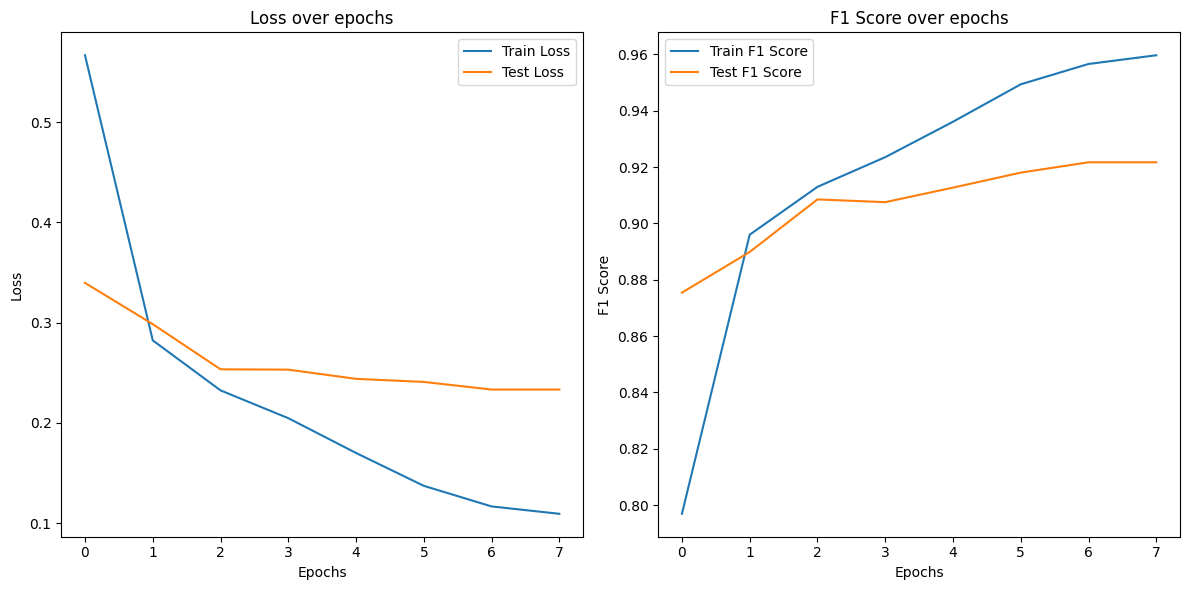

In [37]:
# Plotting the metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_train, label='Train Loss')
plt.plot(loss_test, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f1_train, label='Train F1 Score')
plt.plot(f1_test, label='Test F1 Score')
plt.title('F1 Score over epochs')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms as transforms

# Load FashionMNIST dataset

transform = torchvision.transforms.ToTensor()  # You can add more transformations if needed
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform=transform)



In [39]:
from torch.utils.data import DataLoader
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
EPOCHS = 200
BATCH_SIZE = 256  # You can adjust this based on your needs
# Create data loaders
TRAINLOADER = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
TESTLOADER = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

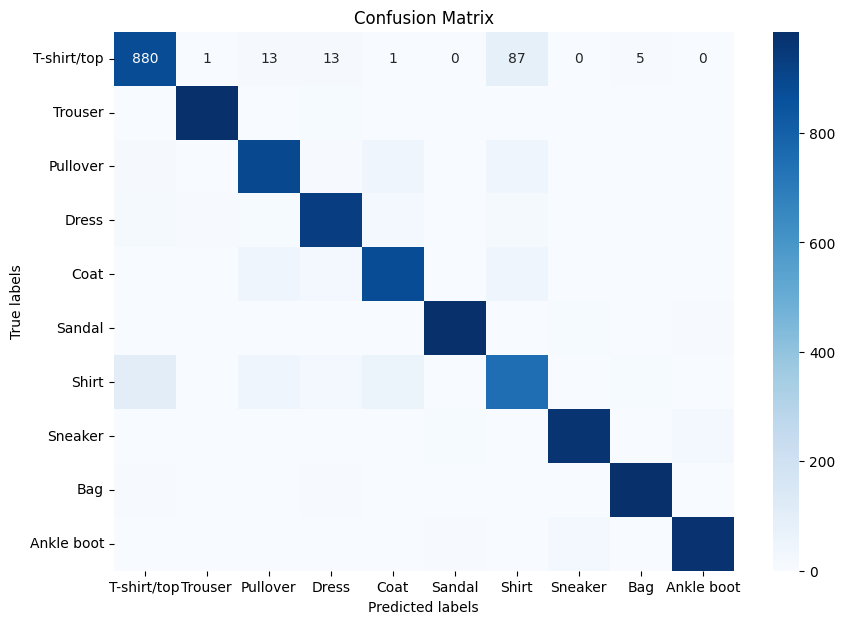

In [40]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import torch
model = torch.load('model/'+name+'.pth')

input_size =  28*28
class_labels = trainset.classes

model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for data in TESTLOADER:
        inputs, labels = data
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        # outputs = model(inputs.view(-1, input_size))
        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.cpu().tolist())
        all_true_labels.extend(labels.cpu().tolist())


# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()